<a href="https://colab.research.google.com/github/DeaWahsa/skripsikuu/blob/main/Semhas_bismillah2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD DAN PREPROCESSING DATA**

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

data_mitra = pd.read_csv(path + 'mitra_telkom.csv', encoding="ISO-8859-1")

In [192]:
data_mitra

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label
0,8,3582546,28660368,59,74,1,0,0,1,0,1,0,1,0,1,0,3
1,8,16057014,128456112,59,74,1,0,0,1,0,1,0,1,0,1,0,3
2,8,1955579,15644632,59,74,1,0,0,1,0,1,0,1,0,1,0,3
3,8,24203409,193627272,59,74,1,0,0,1,0,1,0,1,0,1,0,3
4,8,7735037,61880296,59,74,1,0,0,1,0,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1
6918,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1
6919,16,2165478,34647648,29,2,0,1,0,1,0,1,0,1,0,0,1,1
6920,16,2103255,33652080,29,2,0,1,0,1,0,1,0,1,0,0,1,1


In [193]:
data_mitra.isnull().sum()

Jumlah Projek                           0
Local Amount                            0
nilai projek per LoP                    0
Duration (Days)                         0
Masalaku                                0
kontrak harga satuan kurang memenuhi    0
kontrak harga satuan memenuhi           0
kontrak harga satuan tidak memenuhi     0
alker lengkap                           0
alker tidak lengkap                     0
stok material tersedia                  0
stok material tidak tersedia            0
team lengkap                            0
team tidak lengkap                      0
rapih                                   0
tidak rapih                             0
Label                                   0
dtype: int64

In [194]:
# Cek jumlah baris pada data
jumlah_baris = data_mitra.shape[0]

print("Jumlah baris pada data:", jumlah_baris)

Jumlah baris pada data: 6922


In [195]:
print(data_mitra['Label'].value_counts())
#print(df_dataTraining.value_counts())

0    4277
2    1427
3     948
1     270
Name: Label, dtype: int64


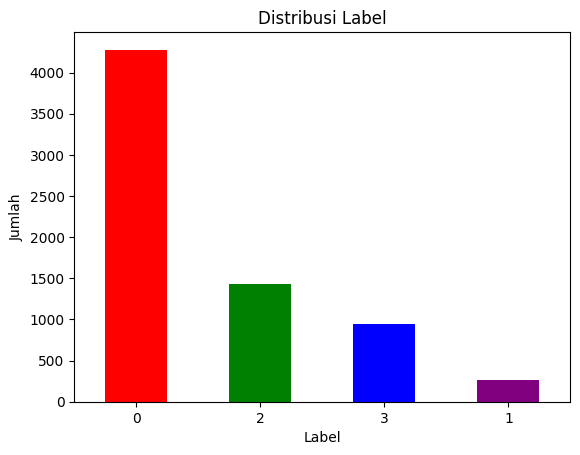

In [196]:
import matplotlib.pyplot as plt

counts = data_mitra['Label'].value_counts()

# Daftar warna untuk setiap label
colors = ['red', 'green', 'blue', 'purple']

# Plot
counts.plot(kind='bar', color=colors)
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [197]:
X = data_mitra.drop("Label",axis=1).to_numpy()
X

array([[        8,   3582546,  28660368, ...,         0,         1,
                0],
       [        8,  16057014, 128456112, ...,         0,         1,
                0],
       [        8,   1955579,  15644632, ...,         0,         1,
                0],
       ...,
       [       16,   2165478,  34647648, ...,         0,         0,
                1],
       [       16,   2103255,  33652080, ...,         0,         0,
                1],
       [       16,   2165478,  34647648, ...,         0,         0,
                1]])

In [198]:
y = data_mitra['Label'].to_numpy()
X = data_mitra.drop("Label",axis=1).to_numpy()

In [199]:
data_mitra['Label'] = pd.to_numeric(data_mitra['Label'])

In [200]:
y = data_mitra["Label"].to_numpy()
y[0:5]

array([3, 3, 3, 3, 3])

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, stratify=y, random_state=42)

In [202]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4845, 16)
(4845,)
(2077, 16)
(2077,)


**XGBOOST**

In [203]:
import xgboost as xgb

In [204]:
# Buat objek XGBoost
xgb_clf = xgb.XGBClassifier()

In [205]:
# Train XGBoost classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': len(set(y_train)) + 1
}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Predict for test data
y_pred = bst.predict(dtest)

In [206]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8598940779971113
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1283
           1       0.83      0.65      0.73        81
           2       0.81      0.72      0.76       428
           3       0.82      0.74      0.78       285

    accuracy                           0.86      2077
   macro avg       0.84      0.77      0.80      2077
weighted avg       0.86      0.86      0.86      2077

Confusion Matrix:
[[1213    3   45   22]
 [  15   53    6    7]
 [  95    8  308   17]
 [  53    0   20  212]]


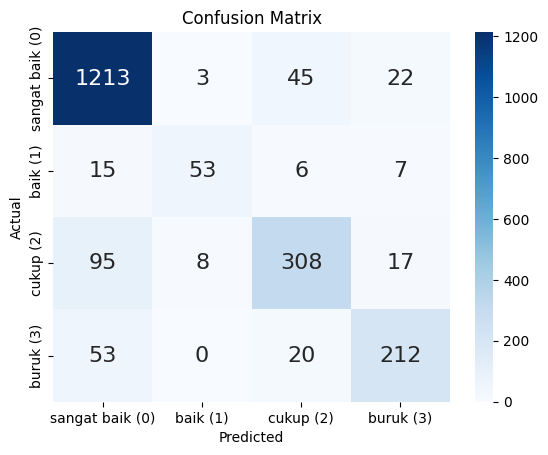

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cetak confusion matrix dalam bentuk gambar
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            annot_kws={"size": 16, "ha": 'center', "va": 'center'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Atur label sumbu x dan y
plt.xticks([0.5, 1.5, 2.5, 3.5], ['sangat baik (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['sangat baik (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])

plt.title('Confusion Matrix')
plt.show()

In [208]:
y_pred

array([2., 0., 1., ..., 0., 0., 3.], dtype=float32)

In [209]:
# Pastikan y_test dan y_pred adalah pandas Series
y_test_series = pd.Series(y_test, name='data test')
y_pred_series = pd.Series(y_pred, name='data prediksi')

df_new = pd.DataFrame({'data test': y_test_series, 'data prediksi': y_pred_series})

# Pastikan X_test adalah DataFrame
X_test_df = pd.DataFrame(X_test)

df_combined = pd.concat([X_test_df.reset_index(drop=True), df_new.reset_index(drop=True)], axis=1)

df_combined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,data test,data prediksi
0,102,48746810,4972174620,45,20,1,0,0,1,0,1,0,1,0,1,0,2,2.0
1,1,20067575,20067575,89,73,1,0,0,1,0,1,0,1,0,1,0,0,0.0
2,16,2103255,33652080,29,2,0,1,0,1,0,1,0,1,0,0,1,1,1.0
3,106,211697660,22439951960,44,28,1,0,0,1,0,1,0,1,0,1,0,0,2.0
4,62,48679450,3018125900,44,23,1,0,0,1,0,1,0,1,0,1,0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,1,13798940,13798940,104,95,1,0,0,1,0,1,0,1,0,1,0,0,0.0
2073,87,54599770,4750179990,45,47,1,0,0,1,0,1,0,1,0,1,0,0,2.0
2074,1,512589503,512589503,44,15,1,0,0,1,0,1,0,1,0,1,0,0,0.0
2075,110,49459180,5440509800,44,41,1,0,0,1,0,1,0,1,0,1,0,0,0.0


In [210]:
df_combined.to_excel("output_perbandingan.xlsx")

In [211]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 3
filtered_data_xgboost_03 = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 3)]

filtered_data_xgboost_03

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,data test,data prediksi
118,3,175408300,526224900,89,98,1,0,0,1,0,1,0,1,0,1,0,0,3.0
183,1,16750741,16750741,29,30,1,0,0,1,0,1,0,1,0,1,0,0,3.0
187,4,81714031,326856124,44,49,1,0,0,1,0,1,0,1,0,1,0,0,3.0
271,4,267817665,1071270660,44,49,1,0,0,1,0,1,0,1,0,1,0,0,3.0
384,5,156251132,781255660,94,208,1,0,0,1,0,1,0,1,0,1,0,0,3.0
402,5,29611167,148055835,59,75,1,0,0,1,0,1,0,1,0,1,0,0,3.0
442,23,34416736,791584928,59,71,1,0,0,1,0,1,0,1,0,1,0,0,3.0
600,7,97087161,679610127,59,72,1,0,0,1,0,1,0,1,0,1,0,0,3.0
607,13,451923634,5875007242,59,87,1,0,0,1,0,1,0,1,0,1,0,0,3.0
631,3,19762211,59286633,44,56,1,0,0,1,0,1,0,1,0,1,0,0,3.0


In [212]:
filtered_data_xgboost_03.to_excel("filtered data xgboost label 0 dan label 3.xlsx")

In [213]:
from sklearn.ensemble import AdaBoostClassifier

In [214]:
# Buat objek AdaboostClassifier
adaboost_clf = AdaBoostClassifier()

# Latih model pada data pelatihan
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [215]:
# Buat prediksi pada data pengujian
y_pred = adaboost_clf.predict(X_test)

In [216]:
# Hitung akurasi dari prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.7669715936446798


In [217]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7669715936446798
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1283
           1       0.40      0.23      0.29        81
           2       0.67      0.63      0.65       428
           3       0.71      0.57      0.63       285

    accuracy                           0.77      2077
   macro avg       0.65      0.58      0.61      2077
weighted avg       0.76      0.77      0.76      2077

Confusion Matrix:
[[1142   12   84   45]
 [  39   19   16    7]
 [ 133   10  270   15]
 [  81    7   35  162]]


In [218]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

class AdaBoost:
    def __init__(self, n_estimators=100, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.estimator_weights = []

    def fit(self, X, y):
        # Inisialisasi bobot sampel
        sample_weights = np.full(len(X), 1 / len(X))

        for _ in range(self.n_estimators):
            # Membuat pengklasifikasi lemah baru (DecisionTreeClassifier dalam hal ini)
            estimator = DecisionTreeClassifier(max_depth=2)  # Mengubah max_depth menjadi 2
            estimator.fit(X, y, sample_weight=sample_weights)

            # Prediksi dengan pengklasifikasi saat ini
            y_pred = estimator.predict(X)

            # Menghitung kesalahan tertimbang
            weighted_error = np.sum(sample_weights * (y_pred != y)) / np.sum(sample_weights)

            # Menghitung bobot pengklasifikasi
            estimator_weight = self.learning_rate * np.log((1 - weighted_error) / weighted_error)

            # Memperbarui bobot sampel
            sample_weights *= np.exp(estimator_weight * (y_pred != y))

            # Menormalisasi bobot sampel
            sample_weights /= np.sum(sample_weights)

            # Menambahkan pengklasifikasi dan bobotnya ke daftar
            self.estimators.append(estimator)
            self.estimator_weights.append(estimator_weight)

    def predict_proba(self, X):
        # Inisialisasi prediksi
        pred = np.zeros((X.shape[0], np.max(y) + 1))

        for i in range(len(self.estimators)):
            estimator = self.estimators[i]
            estimator_weight = self.estimator_weights[i]

            # Memperbarui prediksi dengan pengklasifikasi saat ini
            pred += estimator_weight * estimator.predict_proba(X)

        return pred / np.sum(self.estimator_weights)

    def predict(self, X):
        # Memprediksi kelas dengan probabilitas tertinggi
        return np.argmax(self.predict_proba(X), axis=1)

from sklearn.metrics import accuracy_score

# Menginisialisasi model AdaBoost dengan parameter yang berbeda
adaboost = AdaBoost(n_estimators=50, learning_rate=0.5)  # Mengubah jumlah pengklasifikasi dan tingkat pembelajaran

# Melatih model pada set pelatihan
adaboost.fit(X_train, y_train)

# Memprediksi kelas pada set pengujian
y_pred = adaboost.predict(X_test)

# Menghitung akurasi model
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

Akurasi: 0.7761194029850746


In [219]:
from sklearn.ensemble import GradientBoostingClassifier

In [220]:
# Buat objek Gradient Boosting
gb_clf = GradientBoostingClassifier()

# Latih model pada data pelatihan
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [221]:
# Buat prediksi pada data pengujian
y_pred = gb_clf.predict(X_test)

In [222]:
# Hitung akurasi dari prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.8517091959557054


In [223]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8517091959557054
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1283
           1       0.82      0.62      0.70        81
           2       0.82      0.70      0.76       428
           3       0.84      0.71      0.77       285

    accuracy                           0.85      2077
   macro avg       0.84      0.74      0.78      2077
weighted avg       0.85      0.85      0.85      2077

Confusion Matrix:
[[1216    2   43   22]
 [  19   50    7    5]
 [ 106    9  301   12]
 [  67    0   16  202]]


**SOFT VOTING CLASSIFIER**


**PROBABILITAS XGBOOST**

In [224]:
from xgboost import XGBClassifier
import numpy as np

# Membuat objek XGBoostClassifier
xgb_classifier = XGBClassifier()

# Melatih model menggunakan data training
xgb_classifier.fit(X_train, y_train)

# Mendapatkan probabilitas prediksi untuk data uji
proba_xgb = xgb_classifier.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_xgb)

[[1.1382505e-03 1.8548488e-04 9.9862170e-01 5.4607448e-05]
 [9.1472489e-01 1.7251181e-03 6.9172166e-02 1.4377885e-02]
 [6.7311985e-04 9.9844605e-01 8.7320275e-04 7.6986735e-06]
 ...
 [9.6451634e-01 1.5164235e-02 7.4329674e-03 1.2886422e-02]
 [7.3691452e-01 1.4245292e-03 2.5420129e-01 7.4596223e-03]
 [1.7538717e-02 5.7317078e-04 2.4268713e-02 9.5761937e-01]]


**PROBABILITAS ADABOOST**

In [225]:
# Memperoleh probabilitas prediksi
proba_adaboost = adaboost_clf.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_adaboost)

[[0.25876956 0.2353639  0.26818911 0.23767742]
 [0.26401213 0.23355256 0.25093204 0.25150327]
 [0.2803755  0.27738575 0.30704383 0.13519492]
 ...
 [0.26369354 0.23207577 0.25033479 0.25389591]
 [0.26170031 0.22465553 0.26495338 0.24869077]
 [0.25350402 0.22679492 0.25827034 0.26143072]]


**PROBABILITAS GRADIENT BOOSTING**

In [226]:
# Memperoleh probabilitas prediksi
proba_gb = gb_clf.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_gb)

[[3.22222680e-02 9.85461062e-04 9.63363741e-01 3.42853017e-03]
 [7.14093087e-01 1.86203308e-02 2.18717032e-01 4.85695500e-02]
 [6.69155141e-03 9.90089392e-01 2.37498545e-03 8.44070853e-04]
 ...
 [8.39989733e-01 1.25941045e-02 3.79376250e-02 1.09478537e-01]
 [4.09981793e-01 8.56659578e-03 5.28633531e-01 5.28180800e-02]
 [1.19577523e-01 8.39940653e-03 2.39621144e-01 6.32401926e-01]]


In [227]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Fungsi pembobotan manual
def calculate_weighted_vote(y_pred_proba, weights):
    weighted_proba = []
    for i in range(len(y_pred_proba)):
        weighted_proba.append([p * w for p, w in zip(y_pred_proba[i], weights)])
    return weighted_proba

# Bobot manual untuk masing-masing model
weights = [0.3, 0.3, 0.4]

# Inisialisasi Voting Classifier dengan pembobotan manual
voting_clf = VotingClassifier(estimators=[('xgb', xgb_clf), ('adaboost', adaboost_clf), ('gb', gb_clf)], voting='soft')

# Melatih model Voting Classifier
voting_clf.fit(X_train, y_train)

# Menghasilkan prediksi dengan model Voting Classifier
y_pred_proba = voting_clf.predict_proba(X_test)

# Menghitung prediksi berbobot
weighted_pred_proba = calculate_weighted_vote(y_pred_proba, weights)

# Mengambil kelas dengan probabilitas tertinggi
y_pred = [np.argmax(pred) for pred in weighted_pred_proba]

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Voting Classifier dengan bobot manual:", accuracy)

Akurasi Voting Classifier dengan bobot manual: 0.7679345209436688


In [228]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

def soft_voting(classifiers, X, weights):
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        probabilities = clf.predict_proba(X)
        weighted_probabilities += probabilities * weights[i]

    final_predictions = np.argmax(weighted_probabilities, axis=1)
    return final_predictions

def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)

# Constraint: weights should sum to 1
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

# Bounds for weights
bnds = [(0, 1) for _ in range(len(classifiers))]

best_accuracy_firefly = 0.0
best_weights_firefly = None

for _ in range(10):
    initial_weights = np.random.uniform(0, 1, len(classifiers))
    initial_weights /= np.sum(initial_weights)  # Normalize the weights to sum to 1

    result_firefly = minimize(objective_function_firefly, initial_weights, method='SLSQP', bounds=bnds, constraints=cons)
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

Bobot Terbaik dari Algoritma Firefly: [0.43203223 0.37375973 0.19420804]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.8637457871930669


In [231]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Membuat data dummy
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan latih classifier
xgb = XGBClassifier().fit(X_train, y_train)
ada = AdaBoostClassifier().fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)

def evaluate_weights(weights, X, y, classifiers):
    predictions = soft_voting_predict(X, classifiers, weights)
    accuracy = accuracy_score(y, predictions)
    return accuracy

def firefly_algorithm(X, y, classifiers, num_fireflies=10, max_iter=100):
    # Inisialisasi posisi firefly (bobot) secara acak
    fireflies = np.random.rand(num_fireflies, len(classifiers))

    # Normalisasi bobot agar totalnya = 1
    fireflies = fireflies / fireflies.sum(axis=1, keepdims=True)

    best_firefly = fireflies[0]
    best_score = evaluate_weights(best_firefly, X, y, classifiers)

    for _ in range(max_iter):
        for i in range(num_fireflies):
            # Evaluasi fitness firefly
            score = evaluate_weights(fireflies[i], X, y, classifiers)

            # Update best firefly
            if score > best_score:
                best_score = score
                best_firefly = fireflies[i]

            # Update posisi firefly berdasarkan firefly terbaik
            # [Catatan: Implementasi ini sangat sederhana dan bisa diperbaiki]
            fireflies[i] = fireflies[i] + np.random.rand() * (best_firefly - fireflies[i])

            # Normalisasi bobot agar totalnya = 1
            fireflies[i] = fireflies[i] / sum(fireflies[i])

    return best_firefly

def soft_voting_predict(X, classifiers, weights):
    probs = np.array([clf.predict_proba(X) for clf in classifiers])
    weighted_avg_probs = np.average(probs, axis=0, weights=weights)
    predictions = np.argmax(weighted_avg_probs, axis=1)
    return predictions

# Dapatkan bobot optimal dengan algoritma firefly
optimal_weights = firefly_algorithm(X_train, y_train, [xgb, ada, gb])

# Gunakan soft voting untuk membuat prediksi
predictions = soft_voting_predict(X_test, [xgb, ada, gb], optimal_weights)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

print("Bobot Terbaik dari Algoritma Firefly:", optimal_weights)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", accuracy)

Bobot Terbaik dari Algoritma Firefly: [0.1719865  0.37515556 0.45285794]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.88


In [232]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Inisialisasi dan latih classifier
xgb = XGBClassifier().fit(X_train, y_train)
ada = AdaBoostClassifier().fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)

def evaluate_weights(weights, X, y, classifiers):
    predictions = soft_voting_predict(X, classifiers, weights)
    accuracy = accuracy_score(y, predictions)
    return accuracy

def firefly_algorithm(X, y, classifiers, num_fireflies=10, max_iter=100):
    # Inisialisasi posisi firefly (bobot) secara acak
    fireflies = np.random.rand(num_fireflies, len(classifiers))

    # Normalisasi bobot agar totalnya = 1
    fireflies = fireflies / fireflies.sum(axis=1, keepdims=True)

    best_firefly = fireflies[0]
    best_score = evaluate_weights(best_firefly, X, y, classifiers)

    for _ in range(max_iter):
        for i in range(num_fireflies):
            # Evaluasi fitness firefly
            score = evaluate_weights(fireflies[i], X, y, classifiers)

            # Update best firefly
            if score > best_score:
                best_score = score
                best_firefly = fireflies[i]

            # Update posisi firefly berdasarkan firefly terbaik
            # [Catatan: Implementasi ini sangat sederhana dan bisa diperbaiki]
            fireflies[i] = fireflies[i] + np.random.rand() * (best_firefly - fireflies[i])

            # Normalisasi bobot agar totalnya = 1
            fireflies[i] = fireflies[i] / sum(fireflies[i])

    return best_firefly

def soft_voting_predict(X, classifiers, weights):
    probs = np.array([clf.predict_proba(X) for clf in classifiers])
    weighted_avg_probs = np.average(probs, axis=0, weights=weights)
    predictions = np.argmax(weighted_avg_probs, axis=1)
    return predictions

# Dapatkan bobot optimal dengan algoritma firefly
optimal_weights = firefly_algorithm(X_train, y_train, [xgb, ada, gb])

# Gunakan soft voting untuk membuat prediksi
predictions = soft_voting_predict(X_test, [xgb, ada, gb], optimal_weights)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

print("Bobot Terbaik dari Algoritma Firefly:", optimal_weights)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", accuracy)

Bobot Terbaik dari Algoritma Firefly: [0.61302425 0.02241925 0.3645565 ]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.8866666666666667


In [230]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Inisialisasi dan latih classifier
xgb = XGBClassifier().fit(X_train, y_train)
ada = AdaBoostClassifier().fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)

def soft_voting_predict(X, classifiers, weights):
    probs = np.array([clf.predict_proba(X) for clf in classifiers])
    weighted_avg_probs = np.average(probs, axis=0, weights=weights)
    predictions = np.argmax(weighted_avg_probs, axis=1)
    return predictions

def evaluate_weights(weights, X, y, classifiers):
    predictions = soft_voting_predict(X, classifiers, weights)
    accuracy = accuracy_score(y, predictions)
    return accuracy

def firefly_algorithm(X, y, classifiers, num_fireflies=10, max_iter=100):
    fireflies = np.random.rand(num_fireflies, len(classifiers))
    fireflies = fireflies / fireflies.sum(axis=1, keepdims=True)

    best_firefly = fireflies[0]
    best_score = evaluate_weights(best_firefly, X, y, classifiers)

    for _ in range(max_iter):
        for i in range(num_fireflies):
            score = evaluate_weights(fireflies[i], X, y, classifiers)
            if score > best_score:
                best_score = score
                best_firefly = fireflies[i]

            fireflies[i] = fireflies[i] + np.random.rand() * (best_firefly - fireflies[i])
            fireflies[i] = fireflies[i] / sum(fireflies[i])

    return best_firefly

# Dapatkan bobot optimal dengan algoritma firefly
optimal_weights = firefly_algorithm(X_train, y_train, [xgb, ada, gb])

# Gunakan soft voting untuk membuat prediksi
predictions = soft_voting_predict(X_test, [xgb, ada, gb], optimal_weights)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

print("Bobot Terbaik dari Algoritma Firefly:", optimal_weights)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", accuracy)

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Fungsi soft voting dengan bobot yang ditentukan
def soft_voting(classifiers, X, weights):
    # Menginisialisasi array untuk menyimpan probabilitas kelas yang diboboti
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        # Menghitung probabilitas kelas untuk setiap model
        probabilities = clf.predict_proba(X)
        # Memboboti probabilitas kelas dengan bobot yang sesuai
        weighted_probabilities += probabilities * weights[i]

    # Menghitung kelas dengan probabilitas tertinggi yang diboboti sebagai prediksi akhir
    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Fungsi tujuan untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Membalikkan akurasi untuk minimasi

# Parameter algoritma Firefly
num_fireflies = 30  # Kurangi jumlah "firefly" untuk optimisasi yang lebih cepat
max_generation_firefly = 100  # Kurangi jumlah generasi untuk optimisasi yang lebih cepat
alpha = 0.1  # Sesuaikan alpha sesuai dengan eksplorasi vs. eksploitasi yang diinginkan
beta = 1.0  # Anda dapat bereksperimen dengan beta, tetapi 1.0 adalah nilai yang masuk akal

# Batas bawah dan atas untuk bobot Firefly
lower_bound_firefly = 0.0  # Sesuaikan batas bawah sesuai kebutuhan
upper_bound_firefly = 1.0  # Sesuaikan batas atas untuk memastikan bobot berjumlah 1

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Lakukan optimisasi dengan algoritma Firefly
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalisasi bobot sehingga jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Output hasil
print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Fungsi soft voting dengan bobot yang ditentukan
def soft_voting(classifiers, X, weights):
    # Menginisialisasi array untuk menyimpan probabilitas kelas yang diboboti
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        # Menghitung probabilitas kelas untuk setiap model
        probabilities = clf.predict_proba(X)
        # Memboboti probabilitas kelas dengan bobot yang sesuai
        weighted_probabilities += probabilities * weights[i]

    # Menghitung kelas dengan probabilitas tertinggi yang diboboti sebagai prediksi akhir
    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Fungsi tujuan untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Membalikkan akurasi untuk minimasi

# Parameter algoritma Firefly
num_fireflies = 30  # Kurangi jumlah "firefly" untuk optimisasi yang lebih cepat
max_generation_firefly = 100  # Kurangi jumlah generasi untuk optimisasi yang lebih cepat
alpha = 0.1  # Sesuaikan alpha sesuai dengan eksplorasi vs. eksploitasi yang diinginkan
beta = 1.0  # Anda dapat bereksperimen dengan beta, tetapi 1.0 adalah nilai yang masuk akal

# Batas bawah dan atas untuk bobot Firefly
lower_bound_firefly = 0.0  # Sesuaikan batas bawah sesuai kebutuhan
upper_bound_firefly = 1.0  # Sesuaikan batas atas untuk memastikan bobot berjumlah 1

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Lakukan optimisasi dengan algoritma Firefly
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalisasi bobot sehingga jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Menggunakan bobot terbaik untuk prediksi
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

# Output hasil
print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test, final_predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, final_predictions))

In [ ]:
import pandas as pd
import xgboost as xgb

# Ganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

# Membaca data mitra dari file CSV
data_mitra = pd.read_csv(path + 'mitra_telkom.csv', encoding="ISO-8859-1")

# Memisahkan fitur (features) dan label (target) dari data
X = data_mitra.drop('Label', axis=1)  # Fitur-fitur
y = data_mitra['Label']  # Label

# Melakukan training algoritma XGBoost dengan data yang ada
model = xgb.XGBClassifier()
model.fit(X, y)

# Pastikan data baru hanya memiliki fitur-fitur yang sama dengan data pelatihan
fitur_data_baru = data_mitra[X.columns]

# Prediksi data baru
prediksi = model.predict(fitur_data_baru)

# Menggunakan model probabilistik untuk mendapatkan probabilitas kelas
probabilitas_prediksi = model.predict_proba(fitur_data_baru)

# Menambahkan kolom "Label_Prediksi" ke data baru dan mengisinya dengan hasil prediksi
data_mitra['Label XGBoost'] = prediksi

# Tampilkan data baru beserta label hasil prediksi dari XGBoost
data_mitra

In [ ]:
# Melakukan pelatihan algoritma Adaboost dengan data yang ada
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(X, y)

# Melakukan prediksi data baru menggunakan model Adaboost
prediksi_adaboost = model_adaboost.predict(fitur_data_baru)

# Menggunakan model probabilistik untuk mendapatkan probabilitas kelas dengan Adaboost
probabilitas_prediksi_adaboost = model_adaboost.predict_proba(fitur_data_baru)

# Menambahkan kolom "Label Adaboost" ke data baru dan mengisinya dengan hasil prediksi Adaboost
data_mitra['Label Adaboost'] = prediksi_adaboost

data_mitra[:10]

In [ ]:
# Melakukan training algoritma Gradient Boosting dengan data yang ada
model_gb = GradientBoostingClassifier()
model_gb.fit(X, y)

# Prediksi data baru menggunakan model Gradient Boosting
prediksi_gb = model_gb.predict(fitur_data_baru)

# Menggunakan model probabilistik untuk mendapatkan probabilitas kelas dengan Gradient Boosting
probabilitas_prediksi_gb = model_gb.predict_proba(fitur_data_baru)

# Menambahkan kolom "Label Gradient Boosting" ke data baru dan mengisinya dengan hasil prediksi Gradient Boosting
data_mitra['Label Gradient Boosting'] = prediksi_gb

# Tampilkan data baru beserta label hasil prediksi dari Gradient Boosting
data_mitra

In [ ]:
# Fungsi voting lembut menggunakan bobot yang ditentukan (hasil dari Firefly)
def soft_voting(weights, classifiers, X):
    votes = np.zeros((len(X), len(classifiers), len(np.unique(y))))
    for i, clf in enumerate(classifiers):
        probabilities = clf.predict_proba(X)
        votes[:, i, :] = probabilities * weights[i]  # Kalikan probabilitas dengan bobot
    return np.argmax(np.sum(votes, axis=1), axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Tampilkan data baru beserta hasil prediksi dari Soft Voting
prediksi_soft_voting = soft_voting(best_weights_firefly, classifiers, fitur_data_baru)
data_mitra['Label Soft Voting'] = prediksi_soft_voting

data_mitra

In [ ]:
# Menyimpan DataFrame ke file CSV
data_prediksi_csv = "data prediksi(2).csv"  # Nama file CSV yang ingin disimpan
path_direktori = "/content/drive/My Drive/Colab Notebooks"  # Path lengkap ke direktori penyimpanan (ubah sesuai dengan direktori Anda)
data_mitra.to_csv(path_direktori + "/" + data_prediksi_csv, index=False)  # Menyimpan DataFrame ke file CSV

In [ ]:
# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_prediksi = pd.read_csv(path + 'data prediksi(2).csv', encoding="ISO-8859-1")
data_prediksi

In [ ]:
print(data_prediksi['Label Soft Voting'].value_counts())
#print(df_dataTraining.value_counts())

In [ ]:
# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")
data_klasifikasi

In [ ]:
print(data_klasifikasi['Label Soft Voting'].value_counts())
#print(df_dataTraining.value_counts())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd  # Anda perlu mengimpor pandas juga

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(2).csv', encoding="ISO-8859-1")

# Anda sudah melatih klasifikasi individual bernama clf1, clf2, dan clf3
soft_voting = VotingClassifier(estimators=[('xgb', xgb_clf), ('adaboost', adaboost_clf), ('gb', gb_clf)], voting='soft')

encoder_vendor = LabelEncoder()
encoder_wbs = LabelEncoder()

data_klasifikasi['Name of Vendor'] = encoder_vendor.fit_transform(data_klasifikasi['Name of Vendor'])
data_klasifikasi['Description Project'] = encoder_wbs.fit_transform(data_klasifikasi['WBS Desc'])

# Menghapus baris dengan nilai NaN di 'Label Soft Voting'
data_klasifikasi.dropna(subset=['Label Soft Voting'], inplace=True)

# Inisialisasi X_train dan y_train sesuai dengan data yang Anda punya
X_train = data_klasifikasi[['Name of Vendor', 'Description Project']]
y_train = data_klasifikasi['Label Soft Voting']

soft_voting.fit(X_train, y_train)

# Menghitung jumlah data berdasarkan 'Name of Vendor' dan 'Label Soft Voting'
vendor_label_counts = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting']).size().unstack(fill_value=0)

# Menghitung total jumlah data berdasarkan 'Name of Vendor'
vendor_total_counts = vendor_label_counts.sum(axis=1)

# Menghitung proporsi Label Soft Voting 0 dalam setiap vendor
prop_label0 = vendor_label_counts[0] / vendor_total_counts

# Menghitung proporsi Label Soft Voting 1 dalam setiap vendor
prop_label1 = vendor_label_counts[1] / vendor_total_counts

# Menghitung proporsi Label Soft Voting 2 dalam setiap vendor
prop_label2 = vendor_label_counts[2] / vendor_total_counts

# Menghitung proporsi Label Soft Voting 3 dalam setiap vendor
prop_label3 = vendor_label_counts[3] / vendor_total_counts

# Menggunakan encoder yang sama untuk mengubah kembali nilai ke asal pada sumbu x
reversed_vendor_labels = encoder_vendor.inverse_transform(vendor_label_counts.index)

# Membuat diagram lingkaran
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Set3.colors
wedges, texts, autotexts = ax.pie([prop_label0.sum(), prop_label1.sum(), prop_label2.sum(), prop_label3.sum()], labels=['Label 0', 'Label 1', 'Label 2', 'Label 3'], autopct='%1.1f%%', startangle=140, colors=colors)
ax.set_title('Proporsi Label Soft Voting 0, 1 , 2 dan 3')
plt.setp(autotexts, size=8, weight="bold")
ax.axis('equal')  # Lingkaran terlihat seperti lingkaran, bukan elips

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 0]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting baik sekali per Vendor')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 1]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting baik per Vendor')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 2]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting cukup per Vendor')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 3]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting buruk per Vendor')
plt.show()